<a href="https://colab.research.google.com/github/CHANDU0556/OCTAVE/blob/master/Decision_tree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('/content/drive/My Drive/docs/scan/csv_files/kyphosis(Decision_tree).csv')

In [0]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [0]:
X=df.drop('Kyphosis',axis=1)
Y=df['Kyphosis']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=0)
type(X_test)

pandas.core.frame.DataFrame

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred=dtree.predict(X_test)


In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
cm=confusion_matrix(Y_test,y_pred)

In [0]:
accuracy

0.7647058823529411

In [0]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [0]:
feature=list(df.columns[1:])
feature

['Age', 'Number', 'Start']

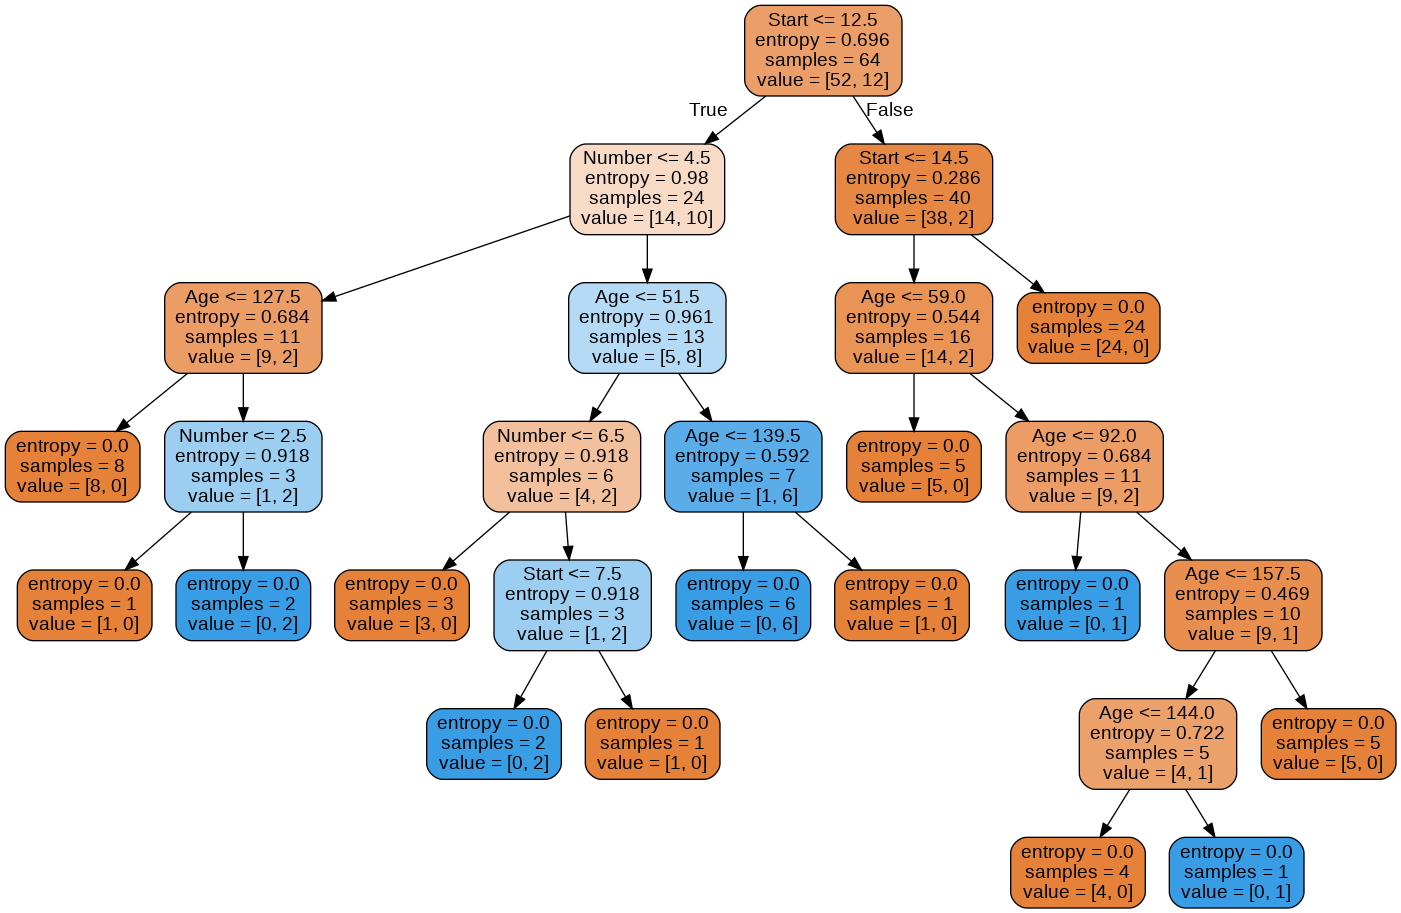

In [0]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=feature,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())